# Capstone Project - NLP Chatbot

### DOMAIN: 
Industrial safety. NLP based Chatbot.

### CONTEXT:
The database comes from one of the biggest industry in Brazil and in the world. It is an urgent need for industries/companies around the globe to understand why employees still suffer some injuries/accidents in plants. Sometimes they also die in such environment.

### DATA DESCRIPTION:
This The database is basically records of accidents from 12 different plants in 03 different countries which every line in the data is an occurrence of an accident.

### Columns description:
* Data: timestamp or time/date information
* Countries: which country the accident occurred (anonymised)
* Local: the city where the manufacturing plant is located (anonymised)
* Industry sector: which sector the plant belongs to
* Accident level: from I to VI, it registers how severe was the accident (I means not severe but VI means very severe)
* Potential Accident Level: Depending on the Accident Level, the database also registers how severe the accident could have   been (due to other factors involved in the accident)
* Gender: if the person is male of female
* Employee or Third Party: if the injured person is an employee or a third party
* Critical Risk: some description of the risk involved in the accident
* Description: Detailed description of how the accident happened.

Link to download the dataset: https://drive.google.com/file/d/1_GmrRP1S2OIa02KlfOBNkYa8uxazGbfE/view?usp=sharing,
Original dataset link: https://www.kaggle.com/ihmstefanini/industrial-safety-and-health-analytics-database

### PROJECT OBJECTIVE:
Design a ML/DL based chatbot utility which can help the professionals to highlight the safety risk as per the incident description.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Replace the folder path with your drive folder path and clone the githb repo

In [ ]:
%cd /content/drive/MyDrive/AIML/Capstone

/content/drive/MyDrive/AIML/Capstone


Run the below code for clone the repo in our Googele drive for first time

In [ ]:
! git clone https://github.com/shyamsparrow/Jan-G4---NLP-Chatbot.git

fatal: destination path 'Jan-G4---NLP-Chatbot' already exists and is not an empty directory.


Change the Current folder into Github repo main folder, all the functions we are calling has to be in this repo.

In [ ]:
%cd /content/drive/MyDrive/AIML/Capstone/Jan-G4---NLP-Chatbot

/content/drive/MyDrive/AIML/Capstone/Jan-G4---NLP-Chatbot


Run this code to update the changes in repo to our drive

In [ ]:
!git pull

remote: Enumerating objects: 32, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 32 (delta 11), reused 8 (delta 8), pack-reused 14
Unpacking objects: 100% (32/32), done.
From https://github.com/shyamsparrow/Jan-G4---NLP-Chatbot
 * [new branch]      CNN_LSTM_Ganesh -> origin/CNN_LSTM_Ganesh
   562c431..2ed79d3  Models          -> origin/Models
   6b96cb0..8db2fcb  Simple_Transformer_Model -> origin/Simple_Transformer_Model
Already up to date.


In [ ]:
pip install pandas --upgrade

### **Transformer Model**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from wordcloud import WordCloud,STOPWORDS
import nltk
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer

# Deep learning libraries
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, LSTM,  Embedding, Dropout, Bidirectional, GlobalMaxPool1D

from keras.utils import np_utils
from keras.layers.merge import Concatenate
#from keras.utils import plot_model

from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

from tensorflow.keras.models import load_model
from tensorflow.keras.models import model_from_json
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Keras pre-processing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
industry_df = pd.read_csv("industry_df_with_stopwords.csv")

In [ ]:
# Select input and output features

X_text_1 = industry_df['Description_preprocessed']
y_text_1 = industry_df['Potential_Accident_Level']

In [ ]:
# Encode labels in column 'Potential Accident Level'and Convert into one-hot encoded vectors:
y_text_1 = LabelEncoder().fit_transform(y_text_1)
y_text_1 = np_utils.to_categorical(y_text_1)

In [ ]:
# Divide our data into testing and training sets:
X_text_train_1, X_text_test_1, y_text_train_1, y_text_test_1 = train_test_split(X_text_1, y_text_1, test_size = 0.20, random_state = 55)

print('X_text_train shape : ({0})'.format(X_text_train.shape))
print('y_text_train shape : ({0},)'.format(y_text_train.shape))
print('X_text_test shape : ({0})'.format(X_text_test.shape))
print('y_text_test shape : ({0},)'.format(y_text_test.shape))

X_text_train shape : ((1644, 185))
y_text_train shape : ((1644, 5),)
X_text_test shape : ((411, 185))
y_text_test shape : ((411, 5),)


In [ ]:
# The first step in word embeddings is to convert the words into thier corresponding numeric indexes.
tokenizer = Tokenizer(num_words=3000)
tokenizer.fit_on_texts(X_text_train_1)
X_text_train_1 = tokenizer.texts_to_sequences(X_text_train_1)
X_text_test_1 = tokenizer.texts_to_sequences(X_text_test_1)

In [ ]:
industry_df['nb_words'] = industry_df['Description_preprocessed'].apply(lambda x: len(x.split(' ')))

print('Minimum number of words: {}'.format(industry_df['nb_words'].min()))
print('Maximum number of words: {}'.format(industry_df['nb_words'].max()))

Minimum number of words: 16
Maximum number of words: 183


In [ ]:
vocab_size = len(tokenizer.word_index) + 1
print("vocab_size:", vocab_size)

maxlen = 185

X_text_train_1 = pad_sequences(X_text_train_1, padding='post', maxlen=maxlen)
X_text_test_1 = pad_sequences(X_text_test_1, padding='post', maxlen=maxlen)

vocab_size: 2755


In [ ]:
import pickle
#pickle.dump(embeddings_dictionary, open('/content/drive/MyDrive/AIML/Capstone/embeddings.pickle', 'wb'))
infile = open('/content/drive/MyDrive/AIML/Capstone/embeddings.pickle','rb')
embeddings_dictionary = pickle.load(infile)

In [ ]:
embedding_size = 200

embedding_matrix = np.zeros((vocab_size, embedding_size))

for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector
embedding_matrix.shape

(2755, 200)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

**Implement a Transformer block as a layer**

In [ ]:
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-4)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-4)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

**Implement embedding layer**

Two seperate embedding layers, one for tokens, one for token index (positions).

In [ ]:
class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

In [ ]:
vocab_size = vocab_size  # Only consider the top 20k words
maxlen = maxlen  # Only consider the first 200 words of each movie review
x_train_1 = X_text_train_1
x_val_1 = X_text_test_1
y_train_1 = y_text_train_1
y_val_1 = y_text_test_1

**Create classifier model using transformer layer**

In [ ]:
embed_dim = embedding_size  # Embedding size for each token
num_heads = 5  # Number of attention heads
ff_dim = 200 # Hidden layer size in feed forward network inside transformer

inputs = layers.Input(shape=(maxlen,))
embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)
x = embedding_layer(inputs)
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
x = transformer_block(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(20, activation="relu")(x)
x = layers.Dropout(0.1)(x)
outputs = layers.Dense(5, activation="softmax")(x)


model_simple = keras.Model(inputs=inputs, outputs=outputs)
print(model_simple.summary())

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 185)]             0         
                                                                 
 token_and_position_embeddin  (None, 185, 200)         588000    
 g_11 (TokenAndPositionEmbed                                     
 ding)                                                           
                                                                 
 transformer_block_11 (Trans  (None, 185, 200)         884400    
 formerBlock)                                                    
                                                                 
 global_average_pooling1d_11  (None, 200)              0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dropout_49 (Dropout)        (None, 200)               0  

In [ ]:
epochs = 5
batch_size = 32
loss = "categorical_crossentropy"
opt = keras.optimizers.Adam(lr=1e-3)

metrics = ["accuracy"]

early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=3)

model_simple.compile(optimizer=opt, loss=loss, metrics=metrics)
history = model_simple.fit(
    x_train_1, y_train_1, batch_size=batch_size, epochs=epochs, validation_data=(x_val_1, y_val_1)
)

Epoch 1/5
11/11 [==============================] - 17s 1s/step - loss: 1.7323 - accuracy: 0.3049 - val_loss: 1.5891 - val_accuracy: 0.2289
Epoch 2/5
11/11 [==============================] - 21s 2s/step - loss: 1.5249 - accuracy: 0.2622 - val_loss: 1.6717 - val_accuracy: 0.3253
Epoch 3/5
11/11 [==============================] - 16s 1s/step - loss: 1.5278 - accuracy: 0.3384 - val_loss: 1.5644 - val_accuracy: 0.2169
Epoch 4/5
11/11 [==============================] - 15s 1s/step - loss: 1.4993 - accuracy: 0.2652 - val_loss: 1.5506 - val_accuracy: 0.2410
Epoch 5/5
11/11 [==============================] - 20s 2s/step - loss: 1.4615 - accuracy: 0.3506 - val_loss: 1.6217 - val_accuracy: 0.3253


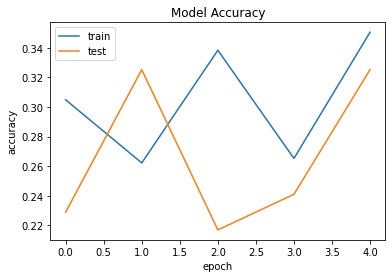

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

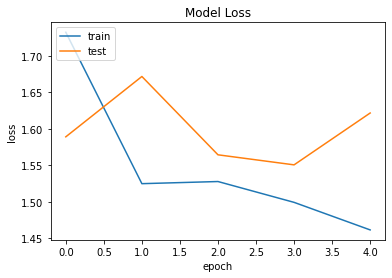

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
embed_dim = embedding_size  # Embedding size for each token
num_heads = 5  # Number of attention heads
ff_dim = 200 # Hidden layer size in feed forward network inside transformer

inputs = layers.Input(shape=(maxlen,))
embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)
x = embedding_layer(inputs)
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
x = transformer_block(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dense(512, activation="relu")(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(20, activation="relu")(x)
x = layers.Dropout(0.1)(x)
outputs = layers.Dense(5, activation="softmax")(x)


model_simple = keras.Model(inputs=inputs, outputs=outputs)
print(model_simple.summary())

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 185)]             0         
                                                                 
 token_and_position_embeddin  (None, 185, 200)         588000    
 g_12 (TokenAndPositionEmbed                                     
 ding)                                                           
                                                                 
 transformer_block_12 (Trans  (None, 185, 200)         884400    
 formerBlock)                                                    
                                                                 
 global_average_pooling1d_12  (None, 200)              0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_50 (Dense)            (None, 512)               102

In [ ]:
epochs = 5
batch_size = 32
loss = "categorical_crossentropy"
opt = keras.optimizers.Adam(lr=1e-4)

metrics = ["accuracy"]

early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=3)

model_simple.compile(optimizer=opt, loss=loss, metrics=metrics)
history = model_simple.fit(
    x_train_1, y_train_1, batch_size=batch_size, epochs=epochs, validation_data=(x_val_1, y_val_1)
)

Epoch 1/5
11/11 [==============================] - 28s 2s/step - loss: 1.5606 - accuracy: 0.2652 - val_loss: 1.5323 - val_accuracy: 0.2771
Epoch 2/5
11/11 [==============================] - 17s 1s/step - loss: 1.4943 - accuracy: 0.2988 - val_loss: 1.5134 - val_accuracy: 0.3373
Epoch 3/5
11/11 [==============================] - 15s 1s/step - loss: 1.4727 - accuracy: 0.3537 - val_loss: 1.5116 - val_accuracy: 0.3494
Epoch 4/5
11/11 [==============================] - 17s 1s/step - loss: 1.4813 - accuracy: 0.3079 - val_loss: 1.5092 - val_accuracy: 0.3133
Epoch 5/5
11/11 [==============================] - 16s 1s/step - loss: 1.4570 - accuracy: 0.3628 - val_loss: 1.5029 - val_accuracy: 0.3855


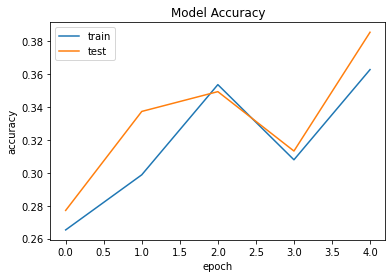

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

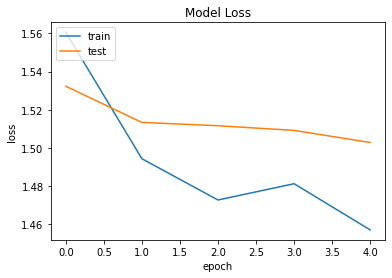

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Train for larger epochs

In [ ]:
epochs = 30
batch_size = 100
loss = "categorical_crossentropy"
opt = keras.optimizers.Adam(lr=1e-4)

metrics = ["accuracy"]

early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=3)

model_simple.compile(optimizer=opt, loss=loss, metrics=metrics)
history = model_simple.fit(
    x_train_1, y_train_1, batch_size=batch_size, epochs=epochs, validation_data=(x_val_1, y_val_1)
)

Epoch 1/30
4/4 [==============================] - 18s 4s/step - loss: 1.2865 - accuracy: 0.4451 - val_loss: 1.4952 - val_accuracy: 0.3735
Epoch 2/30
4/4 [==============================] - 23s 6s/step - loss: 1.2462 - accuracy: 0.4665 - val_loss: 1.4976 - val_accuracy: 0.3614
Epoch 3/30
4/4 [==============================] - 20s 4s/step - loss: 1.2243 - accuracy: 0.4817 - val_loss: 1.5061 - val_accuracy: 0.3735
Epoch 4/30
4/4 [==============================] - 16s 4s/step - loss: 1.2152 - accuracy: 0.5061 - val_loss: 1.4993 - val_accuracy: 0.3735
Epoch 5/30
4/4 [==============================] - 17s 4s/step - loss: 1.1981 - accuracy: 0.4817 - val_loss: 1.5017 - val_accuracy: 0.3614
Epoch 6/30
4/4 [==============================] - 15s 4s/step - loss: 1.1630 - accuracy: 0.4909 - val_loss: 1.5358 - val_accuracy: 0.3735
Epoch 7/30
4/4 [==============================] - 16s 4s/step - loss: 1.1667 - accuracy: 0.4909 - val_loss: 1.5359 - val_accuracy: 0.3373
Epoch 8/30
4/4 [==================

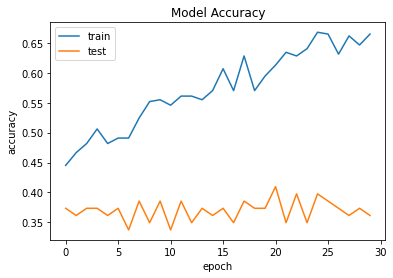

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

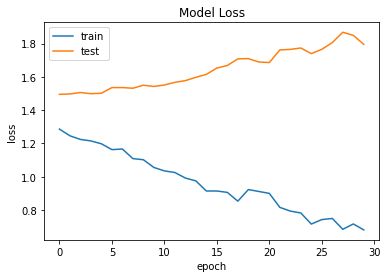

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Try with different batch size and learning rate

In [ ]:
epochs = 30
batch_size = 200
loss = "categorical_crossentropy"
opt = keras.optimizers.Adam(lr=1e-6)

metrics = ["accuracy"]

early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=3)

model_simple.compile(optimizer=opt, loss=loss, metrics=metrics)
history = model_simple.fit(
    x_train_1, y_train_1, batch_size=batch_size, epochs=epochs, validation_data=(x_val_1, y_val_1)
)

Epoch 1/30
2/2 [==============================] - 23s 9s/step - loss: 1.3674 - accuracy: 0.3994 - val_loss: 1.4751 - val_accuracy: 0.3735
Epoch 2/30
2/2 [==============================] - 17s 7s/step - loss: 1.3545 - accuracy: 0.4085 - val_loss: 1.4750 - val_accuracy: 0.3855
Epoch 3/30
2/2 [==============================] - 15s 7s/step - loss: 1.3457 - accuracy: 0.4329 - val_loss: 1.4748 - val_accuracy: 0.3855
Epoch 4/30
2/2 [==============================] - 15s 7s/step - loss: 1.3566 - accuracy: 0.3872 - val_loss: 1.4747 - val_accuracy: 0.3855
Epoch 5/30
2/2 [==============================] - 16s 7s/step - loss: 1.3469 - accuracy: 0.3902 - val_loss: 1.4746 - val_accuracy: 0.3855
Epoch 6/30
2/2 [==============================] - 15s 7s/step - loss: 1.3508 - accuracy: 0.3994 - val_loss: 1.4745 - val_accuracy: 0.3855
Epoch 7/30
2/2 [==============================] - 15s 7s/step - loss: 1.3467 - accuracy: 0.4482 - val_loss: 1.4744 - val_accuracy: 0.3855
Epoch 8/30
2/2 [==================

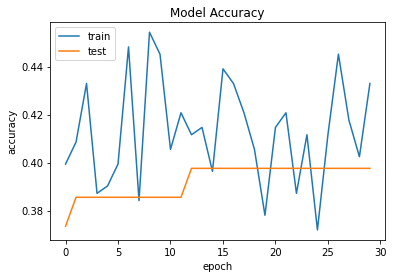

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

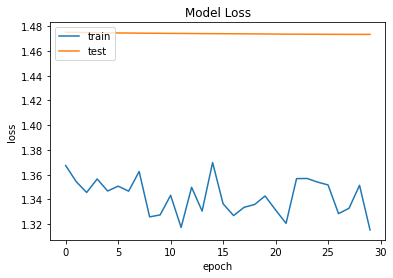

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
epochs = 3
batch_size = 500
loss = "categorical_crossentropy"
opt = keras.optimizers.Adam(lr=1e-5)

metrics = ["accuracy"]

early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=3)

model.compile(optimizer=opt, loss=loss, metrics=metrics)
history = model.fit(
    x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val)
)

Epoch 1/3
1/1 [==============================] - 23s 23s/step - loss: 0.6471 - accuracy: 0.7134 - val_loss: 1.8442 - val_accuracy: 0.3614
Epoch 2/3
1/1 [==============================] - 20s 20s/step - loss: 0.6630 - accuracy: 0.6555 - val_loss: 1.8503 - val_accuracy: 0.3855
Epoch 3/3
1/1 [==============================] - 15s 15s/step - loss: 0.6698 - accuracy: 0.6524 - val_loss: 1.8496 - val_accuracy: 0.3735


# **Try Augmentation**

In [ ]:
!pip install nlpaug

     |████████████████████████████████| 408 kB 5.3 MB/s 
     |████████████████████████████████| 11.3 MB 34.0 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.5 which is incompatible.


In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import nlpaug
import nlpaug.augmenter.word as naw
n = 2
aug = naw.SynonymAug(aug_src='wordnet',aug_max=30)
aug.augment("Misleading reviews. Worst coffee ever had, and sorely disappointing vibe.",n=n)

['Misleading reviews. Worst coffee ever had, and painfully unsatisfying vibe.',
 'Misdirect reviews. Worst coffee ever so had, and sorely dissatisfactory vibe.']

In [ ]:
#X_text = industry_df['Description_preprocessed']
#y_text = industry_df['Potential_Accident_Level']

augmented_text = list()
label_accident_level = list()

for i in range(0,industry_df.shape[0]):
  start = 0
  end = start+n
  for j in range(start,end):
    text = industry_df['Description_preprocessed'][i]
    text = aug.augment(text)
    augmented_text.append(text)
    label_accident_level.append(industry_df['Potential_Accident_Level'][i])
  start = start + n + 1

#Potential_Accident_Level

In [ ]:
# convert the list into dataframe
augmented_df = pd.DataFrame(pd.concat([pd.Series(augmented_text),pd.Series(label_accident_level)],axis=1))

In [ ]:
# rename the columns of dataframe
augmented_df.rename(columns={0:'Augmented_Description',1:'Potential_Accident_Level'},inplace=True)

In [ ]:
#!pip uninstall pandas
#!pip install pandas==1.1.5
import pandas as pd
augmented_df.to_csv('industry_df_augmented.csv',index=False)

**Repeat all the above steps with augmeted Data**

In [ ]:
augmented_df['Potential_Accident_Level'].value_counts()

IV     276
III    212
II     190
I       86
V       58
Name: Potential_Accident_Level, dtype: int64

In [ ]:
# shuffle the data

augmented_df = augmented_df.sample(frac=1)

In [ ]:
# Select input and output features

X_text = augmented_df['Augmented_Description']
y_text = augmented_df['Potential_Accident_Level']

In [ ]:
# Encode labels in column 'Potential Accident Level'and Convert into one-hot encoded vectors:
Lab_en = LabelEncoder()
y_text_en = Lab_en.fit_transform(y_text)
y_text = np_utils.to_categorical(y_text_en)

In [ ]:
# Divide our data into testing and training sets:
X_text_train, X_text_test, y_text_train, y_text_test = train_test_split(X_text, y_text, test_size = 0.20, random_state = 55)

print('X_text_train shape : ({0})'.format(X_text_train.shape))
print('y_text_train shape : ({0},)'.format(y_text_train.shape))
print('X_text_test shape : ({0})'.format(X_text_test.shape))
print('y_text_test shape : ({0},)'.format(y_text_test.shape))

X_text_train shape : ((657,))
y_text_train shape : ((657, 5),)
X_text_test shape : ((165,))
y_text_test shape : ((165, 5),)


In [ ]:
# The first step in word embeddings is to convert the words into thier corresponding numeric indexes.
tokenizer = Tokenizer(num_words=3000)
tokenizer.fit_on_texts(X_text_train)
X_text_train = tokenizer.texts_to_sequences(X_text_train)
X_text_test = tokenizer.texts_to_sequences(X_text_test)

In [ ]:
augmented_df['nb_words'] = augmented_df['Augmented_Description'].apply(lambda x: len(x.split(' ')))

print('Minimum number of words: {}'.format(augmented_df['nb_words'].min()))
print('Maximum number of words: {}'.format(augmented_df['nb_words'].max()))

Minimum number of words: 16
Maximum number of words: 188


In [ ]:
vocab_size = len(tokenizer.word_index) + 1
print("vocab_size:", vocab_size)

maxlen = 190

X_text_train = pad_sequences(X_text_train, padding='post', maxlen=maxlen)
X_text_test = pad_sequences(X_text_test, padding='post', maxlen=maxlen)

vocab_size: 5078


In [ ]:
embedding_size = 200

embedding_matrix = np.zeros((vocab_size, embedding_size))

for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector
embedding_matrix.shape

(5078, 200)

**Implement a Transformer block as a layer**

**Implement embedding layer**

Two seperate embedding layers, one for tokens, one for token index (positions).

In [ ]:
vocab_size = vocab_size  # Only consider the top 20k words
maxlen = maxlen  # Only consider the first 200 words of each movie review
x_train = X_text_train
x_val = X_text_test
y_train = y_text_train
y_val = y_text_test

**Create classifier model using transformer layer**

In [ ]:
embed_dim = embedding_size  # Embedding size for each token
num_heads = 5  # Number of attention heads
ff_dim = 200 # Hidden layer size in feed forward network inside transformer

inputs = layers.Input(shape=(maxlen,))
embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)
x = embedding_layer(inputs)
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
x = transformer_block(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(20, activation="relu")(x)
x = layers.Dropout(0.1)(x)
outputs = layers.Dense(5, activation="softmax")(x)


model = keras.Model(inputs=inputs, outputs=outputs)
print(model.summary())

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 190)]             0         
                                                                 
 token_and_position_embeddin  (None, 190, 200)         1053600   
 g_9 (TokenAndPositionEmbedd                                     
 ing)                                                            
                                                                 
 transformer_block_9 (Transf  (None, 190, 200)         884400    
 ormerBlock)                                                     
                                                                 
 global_average_pooling1d_9   (None, 200)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dropout_46 (Dropout)        (None, 200)               0   

In [ ]:
epochs = 30
batch_size = 32
loss = "categorical_crossentropy"
opt = keras.optimizers.Adam(lr=1e-3)

metrics = ["accuracy"]

early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=3)

model.compile(optimizer=opt, loss=loss, metrics=metrics)
history = model.fit(
    x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val)
)

Epoch 1/30
21/21 [==============================] - 7s 131ms/step - loss: 1.6610 - accuracy: 0.3227 - val_loss: 1.5457 - val_accuracy: 0.3152
Epoch 2/30
21/21 [==============================] - 2s 83ms/step - loss: 1.5075 - accuracy: 0.3105 - val_loss: 1.5148 - val_accuracy: 0.3152
Epoch 3/30
21/21 [==============================] - 2s 74ms/step - loss: 1.5005 - accuracy: 0.3470 - val_loss: 1.4445 - val_accuracy: 0.3939
Epoch 4/30
21/21 [==============================] - 2s 73ms/step - loss: 1.3961 - accuracy: 0.3942 - val_loss: 1.3932 - val_accuracy: 0.4182
Epoch 5/30
21/21 [==============================] - 2s 76ms/step - loss: 1.2284 - accuracy: 0.4764 - val_loss: 1.5597 - val_accuracy: 0.3758
Epoch 6/30
21/21 [==============================] - 2s 75ms/step - loss: 0.9188 - accuracy: 0.5799 - val_loss: 1.0845 - val_accuracy: 0.5576
Epoch 7/30
21/21 [==============================] - 2s 76ms/step - loss: 0.5546 - accuracy: 0.7139 - val_loss: 1.4492 - val_accuracy: 0.5455
Epoch 8/30
2

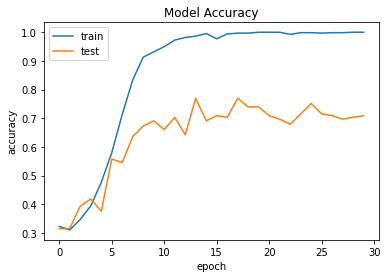

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

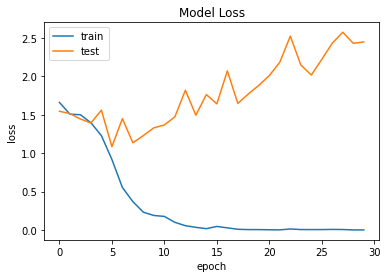

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Validation Data**

In [ ]:
#predict the labels
y_predicted_labels = model.predict(X_text_test)

In [ ]:
y_pred_index = np.argmax(y_predicted_labels,axis=1)
y_original = np.argmax(y_text_test, axis =1)

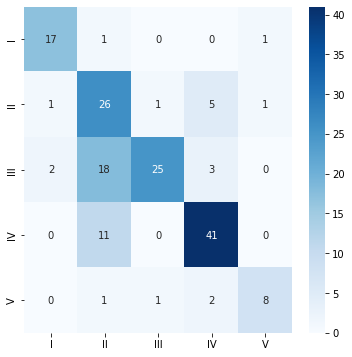

In [ ]:
#plot the confusion matrix
cm = confusion_matrix(y_original,y_pred_index)
cm_label = ['I', 'II', 'III','IV', 'V']
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, cmap='Blues',xticklabels = cm_label, yticklabels = cm_label,fmt='g');

In [ ]:
print(classification_report(y_original, y_pred_index))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87        19
           1       0.46      0.76      0.57        34
           2       0.93      0.52      0.67        48
           3       0.80      0.79      0.80        52
           4       0.80      0.67      0.73        12

    accuracy                           0.71       165
   macro avg       0.77      0.73      0.73       165
weighted avg       0.77      0.71      0.72       165



**Training Data**

In [ ]:
#predict the labels
y_predicted_labels_train = model.predict(X_text_train)

In [ ]:
y_pred_index_train = np.argmax(y_predicted_labels_train,axis=1)
y_original_train = np.argmax(y_text_train, axis =1)

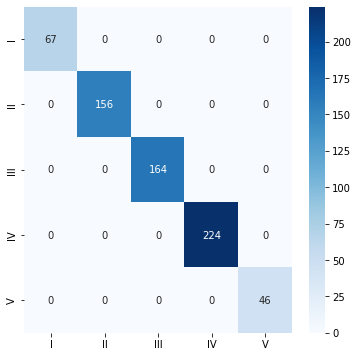

In [ ]:
#plot the confusion matrix
cm = confusion_matrix(y_original_train,y_pred_index_train)
cm_label = ['I', 'II', 'III','IV', 'V']
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, cmap='Blues',xticklabels = cm_label, yticklabels = cm_label,fmt='g');

In [ ]:
print(classification_report(y_original_train, y_pred_index_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       1.00      1.00      1.00       156
           2       1.00      1.00      1.00       164
           3       1.00      1.00      1.00       224
           4       1.00      1.00      1.00        46

    accuracy                           1.00       657
   macro avg       1.00      1.00      1.00       657
weighted avg       1.00      1.00      1.00       657



In [ ]:
# pickle the model

# save the model to disk
filename = 'final_simple_transformer_model_updated.sav'
pickle.dump(model, open(filename, 'wb'))

INFO:tensorflow:Assets written to: ram://f6146012-75b8-4488-bf3f-afdce9916b32/assets


INFO:tensorflow:Assets written to: ram://f6146012-75b8-4488-bf3f-afdce9916b32/assets


In [ ]:
# load the model from disk
#filename = '/content/drive/MyDrive/AIML/Capstone/simple_transformer_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.evaluate(x_val, y_val)
print(result)

6/6 [==============================] - 0s 31ms/step - loss: 2.4470 - accuracy: 0.7091
[2.446956157684326, 0.7090908885002136]


In [ ]:
#loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.evaluate(x_train, y_train)
print(result)

21/21 [==============================] - 1s 36ms/step - loss: 8.8919e-05 - accuracy: 1.0000
[8.891857578419149e-05, 1.0]


# **Using the CSV File industry_df augmented with the same transformer**

In [ ]:
industry_df_augmented = pd.read_csv('https://raw.githubusercontent.com/shyamsparrow/Jan-G4---NLP-Chatbot/Models/industry_augmentation.csv')

In [ ]:
industry_df_augmented.head(2)

,Description,Potential_Accident_Level
0,While removing the drill rod of the Jumbo 08 f...,IV
1,During the activation of a sodium sulphide pum...,IV


In [ ]:
industry_df_augmented['Potential_Accident_Level'].value_counts()

IV     276
III    212
II     190
I       86
V       58
Name: Potential_Accident_Level, dtype: int64

In [ ]:
# Select input and output features

X_text = industry_df_augmented['Description']
y_text = industry_df_augmented['Potential_Accident_Level']

In [ ]:
# Encode labels in column 'Potential Accident Level'and Convert into one-hot encoded vectors:
Lab_en = LabelEncoder()
y_text_en = Lab_en.fit_transform(y_text)
y_text = np_utils.to_categorical(y_text_en)

In [ ]:
# Divide our data into testing and training sets:
X_text_train, X_text_test, y_text_train, y_text_test = train_test_split(X_text, y_text, test_size = 0.20, random_state = 55)

print('X_text_train shape : ({0})'.format(X_text_train.shape))
print('y_text_train shape : ({0},)'.format(y_text_train.shape))
print('X_text_test shape : ({0})'.format(X_text_test.shape))
print('y_text_test shape : ({0},)'.format(y_text_test.shape))

X_text_train shape : ((657,))
y_text_train shape : ((657, 5),)
X_text_test shape : ((165,))
y_text_test shape : ((165, 5),)


In [ ]:
# The first step in word embeddings is to convert the words into thier corresponding numeric indexes.
tokenizer = Tokenizer(num_words=3000)
tokenizer.fit_on_texts(X_text_train)
X_text_train = tokenizer.texts_to_sequences(X_text_train)
X_text_test = tokenizer.texts_to_sequences(X_text_test)

In [ ]:
industry_df_augmented['nb_words'] = industry_df_augmented['Description'].apply(lambda x: len(x.split(' ')))

print('Minimum number of words: {}'.format(industry_df_augmented['nb_words'].min()))
print('Maximum number of words: {}'.format(industry_df_augmented['nb_words'].max()))

Minimum number of words: 16
Maximum number of words: 192


In [ ]:
vocab_size = len(tokenizer.word_index) + 1
print("vocab_size:", vocab_size)

maxlen = 200

X_text_train = pad_sequences(X_text_train, padding='post', maxlen=maxlen)
X_text_test = pad_sequences(X_text_test, padding='post', maxlen=maxlen)

vocab_size: 3937


In [ ]:
%cd /content/drive/MyDrive/AIML/Capstone

/content/drive/MyDrive/AIML/Capstone


In [ ]:
print('Indexing word vectors.')

embeddings_dictionary = {}
f = open('glove.6B.200d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_dictionary[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_dictionary))

Indexing word vectors.
Found 400000 word vectors.


In [ ]:
embedding_size = 200

embedding_matrix = np.zeros((vocab_size, embedding_size))

for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector
embedding_matrix.shape

(3937, 200)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

**Implement a Transformer block as a layer**

In [ ]:
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-4)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-4)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

**Implement embedding layer**

Two seperate embedding layers, one for tokens, one for token index (positions).

In [ ]:
class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

In [ ]:
vocab_size = vocab_size  # Only consider the top 20k words
maxlen = maxlen  # Only consider the first 200 words of each movie review
x_train = X_text_train
x_val = X_text_test
y_train = y_text_train
y_val = y_text_test

**Create classifier model using transformer layer**

In [ ]:
embed_dim = embedding_size  # Embedding size for each token
num_heads = 5  # Number of attention heads
ff_dim = 200 # Hidden layer size in feed forward network inside transformer

inputs = layers.Input(shape=(maxlen,))
embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)
x = embedding_layer(inputs)
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
x = transformer_block(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(20, activation="relu")(x)
x = layers.Dropout(0.1)(x)
outputs = layers.Dense(5, activation="softmax")(x)


model = keras.Model(inputs=inputs, outputs=outputs)
print(model.summary())

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 200)]             0         
                                                                 
 token_and_position_embeddin  (None, 200, 200)         827400    
 g_6 (TokenAndPositionEmbedd                                     
 ing)                                                            
                                                                 
 transformer_block_6 (Transf  (None, 200, 200)         884400    
 ormerBlock)                                                     
                                                                 
 global_average_pooling1d_6   (None, 200)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dropout_29 (Dropout)        (None, 200)               0   

In [ ]:
epochs = 50
batch_size = 100
loss = "categorical_crossentropy"
opt = keras.optimizers.Adam(lr=1e-3)

metrics = ["accuracy"]

early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=4)

model.compile(optimizer=opt, loss=loss, metrics=metrics)
history = model.fit(
    x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val), callbacks = early_stopping
)

Epoch 1/50
7/7 [==============================] - 4s 366ms/step - loss: 1.6539 - accuracy: 0.3075 - val_loss: 1.5053 - val_accuracy: 0.2909
Epoch 2/50
7/7 [==============================] - 1s 213ms/step - loss: 1.4850 - accuracy: 0.3501 - val_loss: 1.4763 - val_accuracy: 0.2909
Epoch 3/50
7/7 [==============================] - 1s 206ms/step - loss: 1.4673 - accuracy: 0.3303 - val_loss: 1.4559 - val_accuracy: 0.3939
Epoch 4/50
7/7 [==============================] - 1s 206ms/step - loss: 1.4581 - accuracy: 0.3379 - val_loss: 1.4476 - val_accuracy: 0.3636
Epoch 5/50
7/7 [==============================] - 1s 207ms/step - loss: 1.4229 - accuracy: 0.3744 - val_loss: 1.4435 - val_accuracy: 0.2909
Epoch 6/50
7/7 [==============================] - 1s 207ms/step - loss: 1.4065 - accuracy: 0.3303 - val_loss: 1.3900 - val_accuracy: 0.3939
Epoch 7/50
7/7 [==============================] - 1s 207ms/step - loss: 1.3755 - accuracy: 0.3638 - val_loss: 1.3870 - val_accuracy: 0.4000
Epoch 8/50
7/7 [====

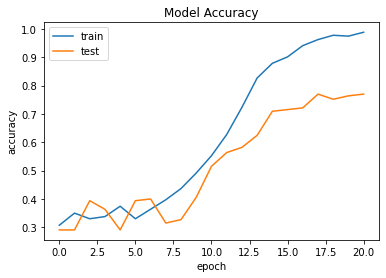

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

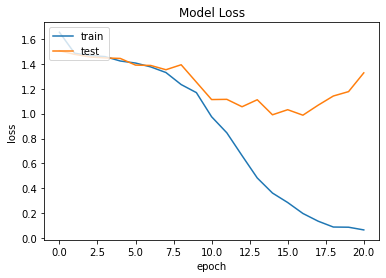

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Validation Data**

In [ ]:
#predict the labels
y_predicted_labels = model.predict(X_text_test)

In [ ]:
y_pred_index = np.argmax(y_predicted_labels,axis=1)
y_original = np.argmax(y_text_test, axis =1)

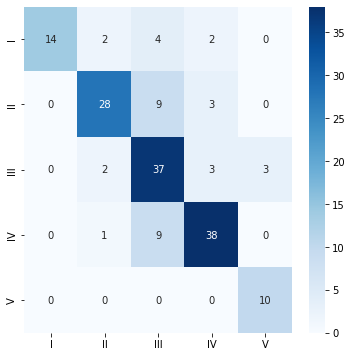

In [ ]:
#plot the confusion matrix
cm = confusion_matrix(y_original,y_pred_index)
cm_label = ['I', 'II', 'III','IV', 'V']
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, cmap='Blues',xticklabels = cm_label, yticklabels = cm_label,fmt='g');

In [ ]:
print(classification_report(y_original, y_pred_index))

              precision    recall  f1-score   support

           0       1.00      0.64      0.78        22
           1       0.85      0.70      0.77        40
           2       0.63      0.82      0.71        45
           3       0.83      0.79      0.81        48
           4       0.77      1.00      0.87        10

    accuracy                           0.77       165
   macro avg       0.81      0.79      0.79       165
weighted avg       0.80      0.77      0.77       165



**Training Data**

In [ ]:
#predict the labels
y_predicted_labels_train = model.predict(X_text_train)

In [ ]:
y_pred_index_train = np.argmax(y_predicted_labels_train,axis=1)
y_original_train = np.argmax(y_text_train, axis =1)

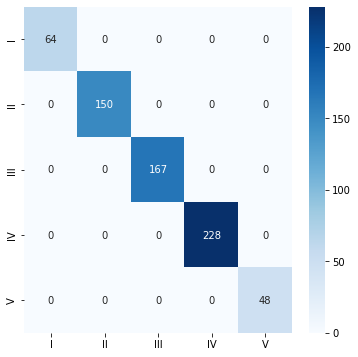

In [ ]:
#plot the confusion matrix
cm = confusion_matrix(y_original_train,y_pred_index_train)
cm_label = ['I', 'II', 'III','IV', 'V']
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, cmap='Blues',xticklabels = cm_label, yticklabels = cm_label,fmt='g');

In [ ]:
print(classification_report(y_original_train, y_pred_index_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        64
           1       1.00      1.00      1.00       150
           2       1.00      1.00      1.00       167
           3       1.00      1.00      1.00       228
           4       1.00      1.00      1.00        48

    accuracy                           1.00       657
   macro avg       1.00      1.00      1.00       657
weighted avg       1.00      1.00      1.00       657



In [ ]:
model.save("/content/drive/MyDrive/AIML/transformer_model")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/AIML/transformer_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/AIML/transformer_model/assets


In [ ]:
from keras.models import load_model
new_model = load_model("/content/drive/MyDrive/AIML/transformer_model")

In [ ]:
new_model.evaluate(x_train, y_train)

21/21 [==============================] - 2s 34ms/step - loss: 0.0066 - accuracy: 1.0000


[0.0066031189635396, 1.0]

In [ ]:
new_model.evaluate(x_val, y_val)

6/6 [==============================] - 0s 25ms/step - loss: 1.3276 - accuracy: 0.7697


[1.3276476860046387, 0.7696969509124756]

In [ ]:
model.predict(x_val)[0]

array([6.1180675e-05, 2.3591888e-01, 7.6079255e-01, 3.2182708e-03,
       9.1669053e-06], dtype=float32)

In [ ]:
new_model.predict(x_val)[0]

array([6.1180675e-05, 2.3591888e-01, 7.6079255e-01, 3.2182708e-03,
       9.1669053e-06], dtype=float32)

# **Predict a sample result**

In [ ]:
# to pickle the files dont run
with open('/content/drive/MyDrive/AIML/parameters.pickle', "wb") as f:
  pickle.dump((Lab_en, tokenizer), f)

In [ ]:
%cd /content/drive/MyDrive/AIML/Capstone/Jan-G4---NLP-Chatbot

/content/drive/MyDrive/AIML/Capstone/Jan-G4---NLP-Chatbot


In [ ]:
!pip install contractions

     |████████████████████████████████| 284 kB 5.6 MB/s 
     |████████████████████████████████| 321 kB 29.9 MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85451 sha256=9a7a9b826427ee2ceb640fe0145f56cb366f65e597fe569d63d222e7326aee12
  Stored in directory: /root/.cache/pip/wheels/25/19/a6/8f363d9939162782bb8439d886469756271abc01f76fbd790f
Successfully built pyahocorasick


In [ ]:
!pip install spellchecker

     |████████████████████████████████| 3.9 MB 5.6 MB/s 
  Created wheel for spellchecker: filename=spellchecker-0.4-py3-none-any.whl size=3966514 sha256=9658818e33d717778deaad613ecfea091d17943c909914a66bd919328d96540c
  Stored in directory: /root/.cache/pip/wheels/58/e9/48/b82b733a7a0a9cc52ed239ccf082ff33e2fbda71670ddd3349
  Created wheel for inexactsearch: filename=inexactsearch-1.0.2-py3-none-any.whl size=7140 sha256=3ea12cf9577a105bc8ba09275d1fb2503f14f0038d7414c652b9ae7461c387a5
  Stored in directory: /root/.cache/pip/wheels/3c/f3/5d/77e8983e86af1c3c62b80d76de8020f560ce6367f1b2763b40
  Created wheel for silpa-common: filename=silpa_common-0.3-py3-none-any.whl size=8482 sha256=f16ee5c2f8c068e98af389d70a4f3cb613069242221a5fc5aab40e910c5f1cfe
  Stored in directory: /root/.cache/pip/wheels/02/81/11/40ef1cf40f5c4021a214653ca3362914f0f9e14e8322f75f9b
  Created wheel for soundex: filename=soundex-1.1.3-py3-none-any.whl size=8894 sha256=5497f10c52334fc6fb73e05626a45d5f25a0908d7486dbea131a

In [ ]:
!pip install pyspellchecker

     |████████████████████████████████| 2.7 MB 5.6 MB/s 


In [ ]:
def model_prediction(usr_txt):
  with open('/content/drive/MyDrive/AIML/parameters.pickle', "rb") as f:
      lab_en, tokenizer_data = pickle.load(f)
  from NLP_text_preprocess import PreProcessing
  import config
  pp = PreProcessing(to_lower = config.to_lower,remove_url=config.remove_url,
                   remove_time = config.remove_time,expand_contraction =config.expand_contraction,
                   remove_special_character=config.remove_special_character,
                   remove_punctuation=config.remove_punctuation,
                   remove_whitespace=config.remove_whitespace,
                   keep_alpha_numeric = False,
                   check_spelling=config.check_spelling,
                   remove_stopword=False,
                   lemmatize_word=config.lemmatize_word)

  pre_txt = pp.preprocess(usr_txt)
  tok_txt = tokenizer_data.texts_to_sequences([pre_txt])
  pad_txt = pad_sequences(tok_txt, padding='post', maxlen=200)
  prediction = new_model.predict(pad_txt, verbose=0)
  pred_index = np.argmax(prediction,axis=1)
  result = lab_en.inverse_transform(pred_index)[0]
  return print('The Potential accident level is', result)

In [ ]:
model_prediction("when my assistant assessed each floor of module a in the work camp, she slipped down and immediately grabbed the laundry line")

The Potential accident level is II


In [ ]:
model_prediction("comb against the wall to take it to the easel, it slipped from his hand, collapsed and exposed his entire foot.")

The Potential accident level is II


In [ ]:
model_prediction("tether, and striking that shape, the tether cable hit with lifeline, projecting its hand into every metal plate of the shape, causing resulting bullet injury to")

The Potential accident level is II


In [ ]:
model_prediction(" that they were pulling the chain of the tecla, the injured one had his left hand resting on my concrete wall ( the line of fire ), product of the tension exerted by the tecle, the helical bolt breaks and the chain lashes")

The Potential accident level is III


In [ ]:
model_prediction("the collaborator antonio bumped the top of the field hat over one branch and was jumped by maribondos. he was bitten inside the ear or another on the shoulder, but ")

The Potential accident level is I
